Find the optimal number of components.

Use the normalized_aggregated.csv inside the same folder (1 line ('VLTO') with string data removed).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

In [3]:
# data
data = pd.read_csv('new_normalized_aggregated.csv', header=0, index_col=0)
print(data)

          Volume  Market Cap  P/E Ratio      vec0      vec1      vec2  \
Symbol                                                                  
IPG     0.201484    0.806974   0.081781  0.239826  0.745115  1.561770   
USB     0.162781    0.862048   0.095914  0.253884  0.791067  1.811428   
ETR     0.152476    0.828159   0.071237  0.218468  0.773046  1.872523   
VRSK    0.125204    0.845854   0.022838  0.213324  0.746491  1.664183   
MMC     0.060214    0.882185   0.035331  0.280788  0.922148  2.002150   
...          ...         ...        ...       ...       ...       ...   
SRE     0.085163    0.855160   0.060825  0.245355  0.868098  2.035904   
WM      0.074332    0.870098   0.033241  0.371892  0.937859  2.094749   
MMM     0.134290    0.859901   0.000000  0.245664  0.784547  1.871211   
CTRA    0.166738    0.827638   0.147693  0.271487  0.869133  1.958813   
RF      0.203229    0.815747   0.156721  0.319176  0.913098  2.014321   

            vec3      vec4  Volatility  
Symbol   

In [4]:
# Silohuette coefficient
n_clusters = np.arange(2, 20)
sils = []
sils_err = []
iterations = 20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(data) 
        labels = gmm.predict(data)
        sil = metrics.silhouette_score(data, labels, metric='euclidean')
        tmp_sil.append(sil)
    tmp_sil = np.array(tmp_sil)
    dx = np.argsort(tmp_sil)[:int(iterations/5)]
    val = np.mean(tmp_sil[dx])
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

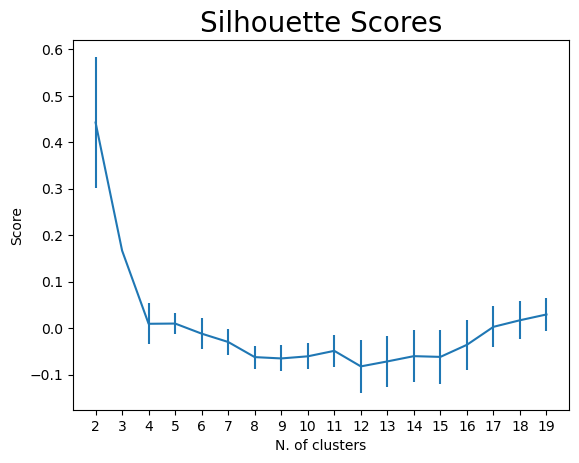

In [5]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

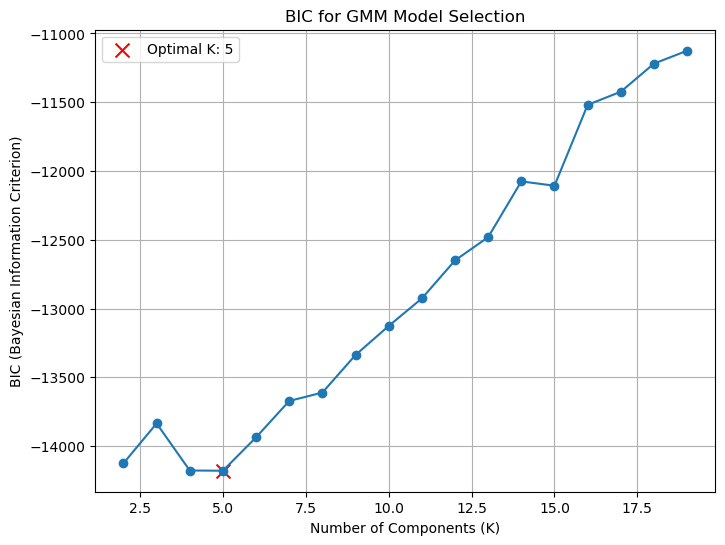

Optimal number of components (K) according to BIC: 5


In [6]:
# Bayesian information criterion (BIC) 1
n_components = np.arange(2, 20)
bic_values = []
# Fit GMM models for different K values and calculate BIC
for n in n_components:
    gmm = GMM(n_components=n, n_init=2, random_state=0)
    gmm.fit(data)
    bic = gmm.bic(data)
    bic_values.append(bic)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Plot the BIC values against the number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components, bic_values, marker='o')
plt.xlabel("Number of Components (K)")
plt.ylabel("BIC (Bayesian Information Criterion)")
plt.title("BIC for GMM Model Selection")
plt.grid(True)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Mark the optimal point on the plot
plt.scatter(optimal_n_components, min(bic_values), c='red', marker='x', s=100, label=f'Optimal K: {optimal_n_components}')
plt.legend()

plt.show()

print("Optimal number of components (K) according to BIC:", optimal_n_components)

In [30]:
# Bayesian information criterion (BIC) 2
n_clusters = np.arange(2, 20)
bics = []
bics_err = []
iterations = 20
for n in n_clusters:
    tmp_bic =[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(data)
        tmp_bic.append(gmm.bic(data))
    tmp_bic = np.array(tmp_bic)
    dx = np.argsort(tmp_bic)[:int(iterations/5)]
    val = np.mean(tmp_bic[dx])
    err = np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

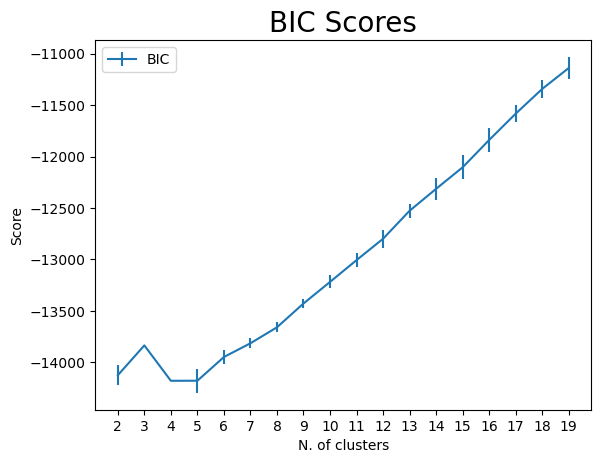

In [31]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

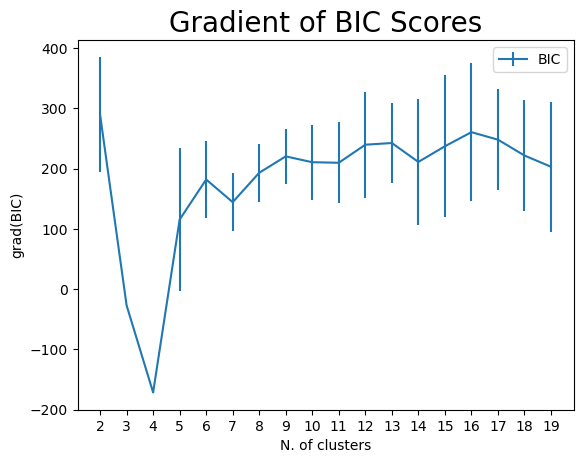

In [32]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [7]:
gmm=GMM(n_components=5, random_state=0).fit(data)
probs = gmm.predict_proba(data)
probs_df = pd.DataFrame(probs)
probs_df.to_csv("probs_5_components.csv", index=0)

For probs.csv files, the Symbol (stock ticker) column needs to be added manually before continuing.

In [14]:
probs = pd.read_csv("probs_5_components.csv", header=0, index_col=0)
cluster_groups = {cluster: [] for cluster in range(0, 5)}
for index, row in probs.iterrows():
    max_cluster = row.idxmax()
    cluster_groups[int(max_cluster)].append(index)
for key, value in cluster_groups.items():
    print(f"Component: {key}, Stocks: {value}")

Component: 0, Stocks: ['VRSK', 'MMC', 'TRGP', 'WELL', 'J', 'ABBV', 'CPRT', 'MLM', 'PKG', 'VTR', 'CEG', 'COR', 'AZO', 'BR', 'EMR', 'UNH', 'MSI', 'TAP', 'IBM', 'JKHY', 'GEHC', 'AON', 'TECH', 'EQR', 'ROK', 'ESS', 'NTAP', 'EXR', 'MDT', 'COST', 'MRK', 'LVS', 'CHD', 'ACN', 'PH', 'APD', 'WMT', 'TMO', 'TYL', 'TT', 'PRU', 'PPL', 'DLR', 'NSC', 'NDAQ', 'CBRE', 'LOW', 'AME', 'IRM', 'ETN', 'LIN', 'SO', 'LYV', 'MDLZ', 'TJX', 'VRTX', 'KHC', 'CSGP', 'IR', 'PWR', 'AMT', 'RHI', 'ADP', 'BRO', 'GD', 'CTAS', 'ICE', 'ITW', 'ROL', 'NWSA', 'AJG', 'HAL', 'IDXX', 'KIM', 'WEC', 'DGX', 'FAST', 'GLW', 'ROP', 'KO', 'DUK', 'TXT', 'AVY', 'RSG', 'BSX', 'BLK', 'UDR', 'PSA', 'CPT', 'HLT', 'SPGI', 'AVB', 'EXPD', 'CTVA', 'MA', 'ROST', 'MCK', 'FICO', 'ABT', 'MET', 'REGN', 'VMC', 'TTWO', 'GWW', 'HON', 'PLD', 'EIX', 'MOH', 'KMI', 'MNST', 'MCD', 'PAYX', 'EPAM', 'LYB', 'LDOS', 'XYL', 'ZBH', 'LNT', 'AWK', 'DOV', 'CL', 'MAR', 'EVRG', 'TEL', 'VRSN', 'HOLX', 'PPG', 'KDP', 'A', 'WMB', 'PEP', 'IQV', 'CTSH', 'CNP', 'TDG', 'OTIS', 'FL

In [15]:
# PCA
data_pca = pd.read_csv("probs_5_components.csv", header=0, index_col=0)
n_components = 2
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

Explained Variance: [0.8460537  0.09624569]


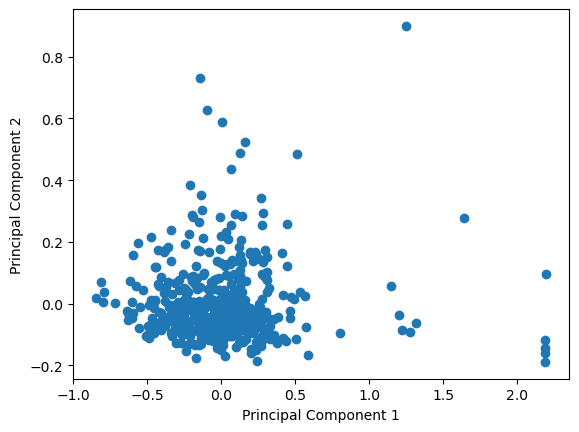

In [16]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [17]:
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df.to_csv("reduced_data.csv", index=False)

In [28]:
reduced_data = pd.read_csv('reduced_data.csv', header=0)
print(reduced_data.shape)

(502, 2)


In [21]:
gmm=GMM(n_components=5, random_state=0).fit(reduced_data)
#print(gmm.covariances_)
#print(gmm.means_)
#print(gmm.weights_)

In [22]:
probs = gmm.predict_proba(reduced_data)
probs_df = pd.DataFrame(probs)
probs_df.to_csv("reduced_probs_5_components.csv", index=0)

Manually add the Symbol column before continuing.

In [24]:
probs = pd.read_csv("reduced_probs_5_components.csv", header=0, index_col=0)
cluster_groups = {cluster: [] for cluster in range(0, 5)}
for index, row in probs.iterrows():
    max_cluster = row.idxmax()
    cluster_groups[int(max_cluster)].append(index)
for key, value in cluster_groups.items():
    print(f"Component: {key}, Stocks: {value}")

Component: 0, Stocks: ['VRSK', 'MMC', 'BAC', 'HRL', 'WELL', 'J', 'ABBV', 'CPRT', 'MLM', 'COR', 'GIS', 'UPS', 'BR', 'EMR', 'AIZ', 'UNH', 'MSI', 'IBM', 'AAPL', 'GEHC', 'MS', 'AON', 'EQR', 'ESS', 'MDT', 'COST', 'BK', 'MRK', 'NDSN', 'CHD', 'ACN', 'PH', 'INTU', 'APD', 'WMT', 'TMO', 'TYL', 'TT', 'PRU', 'NSC', 'NDAQ', 'LOW', 'AME', 'IRM', 'CMCSA', 'LIN', 'SO', 'MDLZ', 'RJF', 'TJX', 'VRTX', 'KHC', 'CSGP', 'AMT', 'ADP', 'BRO', 'GD', 'WST', 'EOG', 'CTAS', 'BRK.B', 'BDX', 'CI', 'ICE', 'ITW', 'PFG', 'AJG', 'WEC', 'AMCR', 'ELV', 'FAST', 'GLW', 'VICI', 'ROP', 'KO', 'DUK', 'AVY', 'RSG', 'BSX', 'BLK', 'MO', 'PSA', 'HIG', 'PCAR', 'CPT', 'HLT', 'SPGI', 'DTE', 'AVB', 'CTVA', 'MA', 'XOM', 'ROST', 'MCK', 'ABT', 'MET', 'REGN', 'FTV', 'VMC', 'GWW', 'BIIB', 'HON', 'DE', 'PLD', 'EIX', 'KMI', 'MNST', 'PFE', 'MCD', 'ACGL', 'PAYX', 'LKQ', 'WFC', 'LYB', 'LDOS', 'XYL', 'LNT', 'AWK', 'DOV', 'ADM', 'CL', 'TEL', 'VRSN', 'HOLX', 'PPG', 'KDP', 'WMB', 'PEP', 'IQV', 'CTSH', 'TDG', 'OTIS', 'INVH', 'MSFT', 'GOOGL', 'ED', 'L

Visualization (2-Dimensional)

In [26]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, edgecolor='black', **kwargs))
        

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        # Create labels for each cluster
        unique_labels = list(set(labels))
        for label_id in unique_labels:
            ax.scatter(X[labels == label_id, 0], X[labels == label_id, 1], s=40, label=f'Cluster {label_id}')

        ax.legend()  # Display the legend
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

/var/folders/zx/xzphhtbn1yjd3p4b4j46l4tc0000gn/T/ipykernel_72233/3123721962.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


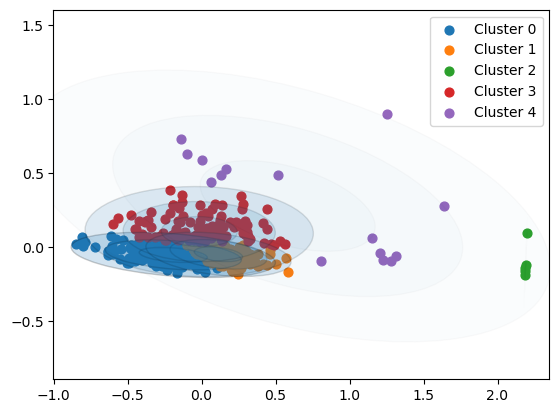

In [29]:
plot_gmm(gmm, reduced_data.values)